## Business Context

In a dental clinic or laboratory setting, understanding the factors influencing the hardness of dental implants is crucial for ensuring patient satisfaction and successful implantation procedures.

The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

## Objective

1. How does the hardness of implants vary depending on dentists?

2. How does the hardness of implants vary depending on methods?

3. What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

4. How does the hardness of implants vary depending on dentists and methods together?



In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

from statsmodels.formula.api import ols

from statsmodels.stats.anova import _get_covariance,anova_lm

### Loading the dataset

In [2]:
# load the dataset
df = pd.read_excel('C:/Users/AKHIL MOHANDAS/Documents/Study_Material/Project 3/Dental+Hardness+data.xlsx',sheet_name='Data')

### Data Overview

#### top 5 data:

In [3]:
df.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


##### bottom 5 data:

In [4]:
df.tail()

,Dentist,Method,Alloy,Temp,Response
85,5,3,1,1600,483
86,5,3,1,1700,405
87,5,3,2,1500,536
88,5,3,2,1600,405
89,5,3,2,1700,312


##### shape of the data

In [5]:
df.shape

(90, 5)

107 rows and 14 columns

#### Checking for any missing data and data types

In [6]:
df.isnull().sum()

Dentist     0
Method      0
Alloy       0
Temp        0
Response    0
dtype: int64

#### Checking the data types of the columns for the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [8]:
df.Dentist = pd.Categorical(df.Dentist)

In [9]:
df.Method = pd.Categorical(df.Method)

In [10]:
df.Alloy = pd.Categorical(df.Alloy)

In [11]:
df.Temp = pd.Categorical(df.Temp)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.8 KB


In [13]:
df.Dentist.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     1
     ..
85    5
86    5
87    5
88    5
89    5
Name: Dentist, Length: 90, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]>

In [14]:
df.Method.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     1
     ..
85    3
86    3
87    3
88    3
89    3
Name: Method, Length: 90, dtype: category
Categories (3, int64): [1, 2, 3]>

In [15]:
df.Alloy.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     2
4     2
     ..
85    1
86    1
87    2
88    2
89    2
Name: Alloy, Length: 90, dtype: category
Categories (2, int64): [1, 2]>

In [16]:
df.Temp.value_counts

<bound method IndexOpsMixin.value_counts of 0     1500
1     1600
2     1700
3     1500
4     1600
      ... 
85    1600
86    1700
87    1500
88    1600
89    1700
Name: Temp, Length: 90, dtype: category
Categories (3, int64): [1500, 1600, 1700]>

In [17]:
df.describe(include='category')

,Dentist,Method,Alloy,Temp
count,90,90,90,90
unique,5,3,2,3
top,1,1,1,1500
freq,18,30,45,30


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     category
 4   Response  90 non-null     int64   
dtypes: category(4), int64(1)
memory usage: 1.8 KB


##### there are no missing values.

#### To analyze how the hardness of dental implants varies based on the factors mentioned (dentists, methods, and alloys), you can use a statistical approach of ANOVA (Analysis of Variance).

###### As both types of alloys cannot be considered together. We must conduct the analysis separately for the two types of alloys:

In [19]:
df_alloy1 = df[df['Alloy'] == 1]
df_alloy2 = df[df['Alloy'] == 2]

In [20]:
df_alloy1.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
6,1,2,1,1500,782
7,1,2,1,1600,698


In [21]:
df_alloy2.head()

,Dentist,Method,Alloy,Temp,Response
3,1,1,2,1500,907
4,1,1,2,1600,792
5,1,1,2,1700,835
9,1,2,2,1500,1115
10,1,2,2,1600,835


##### 1.How does the hardness of implants vary depending on dentists?

Null and Alternate Hypotheses

For each alloy type, the hypotheses are:

###### Null Hypothesis (H0): The hardness of implants does not vary depending on dentists (mean hardness is the same for all dentists).
###### Alternate Hypothesis (H1): The hardness of implants varies depending on dentists (mean hardness is not the same for all dentists)

Dentist
1    749.888889
2    761.222222
3    717.555556
4    681.111111
5    627.666667
Name: Response, dtype: float64


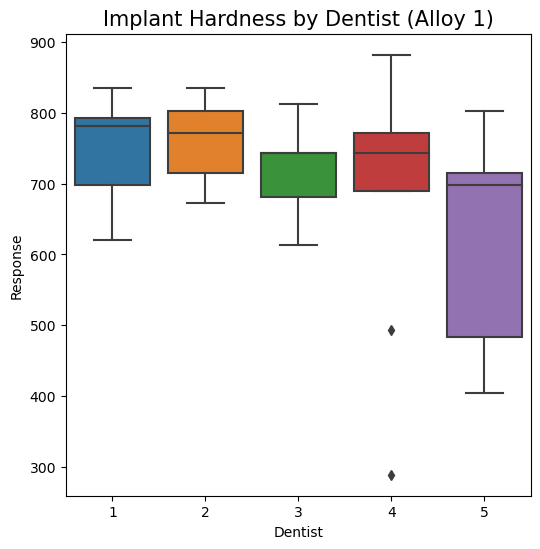

In [22]:
print(df_alloy1.groupby("Dentist")["Response"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "Dentist", y = 'Response' , data = df_alloy1)
a.set_title("Implant Hardness by Dentist (Alloy 1)", fontsize=15)
plt.show()

Dentist
1    816.222222
2    812.111111
3    779.666667
4    746.222222
5    726.111111
Name: Response, dtype: float64


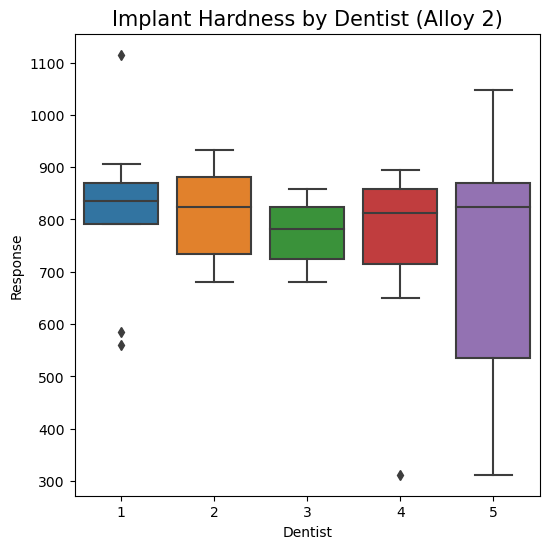

In [23]:
print(df_alloy2.groupby("Dentist")["Response"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "Dentist", y = 'Response' , data = df_alloy2)
a.set_title("Implant Hardness by Dentist (Alloy 2)", fontsize=15)
plt.show()

In this analysis, we aim to determine if there are significant differences in the mean implant hardness among dentists. We will utilize a **One-way ANOVA test** to compare the means from multiple dentists and assess if there is any significant variation in implant hardness attributed to different dentists. However, to ensure the reliability of the ANOVA results, we need to verify two key assumptions:

**One-way ANOVA test**

1.Normality Assumption: Shapiro-Wilk’s test will be applied to the response variable (implant hardness) to assess if the data follows a normal distribution.

2.Equality of Variance Assumption: Levene's test will be applied to the response variable to assess if the variance of implant hardness is equal across all dentists.



**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ distribution of implant hardness measurements follows a normal distribution
against the alternative hypothesis

>$H_a:$ distribution of implant hardness measurements deviates from a normal distribution.

In [24]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df_alloy1['Response']) 
print("Shapiro-Wilk's test p-value for Alloy 1:", p_value)

Shapiro-Wilk's test p-value for Alloy 1: 1.1945070582441986e-05


In [25]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df_alloy2['Response']) 
print("Shapiro-Wilk's test p-value for Alloy 2:", p_value)

Shapiro-Wilk's test p-value for Alloy 2: 0.00040293222991749644


Since p-value(both alloy type 1 and 2) of the test is smaller than the 5% significance level, we can reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [26]:
statistic, p_levene_alloy1 = stats.levene(df_alloy1[df_alloy1['Dentist'] == 1]['Response'],
                                            df_alloy1[df_alloy1['Dentist'] == 2]['Response'],
                                            df_alloy1[df_alloy1['Dentist'] == 3]['Response'],
                                            df_alloy1[df_alloy1['Dentist'] == 4]['Response'],
                                            df_alloy1[df_alloy1['Dentist'] == 5]['Response'])
print("Levene's test p-value for Alloy 1:", p_levene_alloy1)

Levene's test p-value for Alloy 1: 0.2565537418543795


In [27]:
statistic, p_levene_alloy2 = stats.levene(df_alloy2[df_alloy2['Dentist'] == 1]['Response'],
                                            df_alloy2[df_alloy2['Dentist'] == 2]['Response'],
                                            df_alloy2[df_alloy2['Dentist'] == 3]['Response'],
                                            df_alloy2[df_alloy2['Dentist'] == 4]['Response'],
                                            df_alloy2[df_alloy2['Dentist'] == 5]['Response'])
print("Levene's test p-value for Alloy 2:", p_levene_alloy2)

Levene's test p-value for Alloy 2: 0.23686777576324952


Since the p-value(for both alloys) is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

we select $\alpha = 0.05$

**Calculate the p-value**

- We will use the `f_oneway()` function from the `scipy.stats` library to perform a one-way ANOVA test.
- The `f_oneway()` function takes the sample observations from the different groups and returns the test statistic and the p-value for the test. 
    - The sample observations are the implant hardness measurements with respect to the Dentists.

In [28]:
from scipy.stats import f_oneway

test_stat, p_anova_alloy1 = f_oneway(df_alloy1[df_alloy1['Dentist'] == 1]['Response'],
                                        df_alloy1[df_alloy1['Dentist'] == 2]['Response'],
                                        df_alloy1[df_alloy1['Dentist'] == 3]['Response'],
                                        df_alloy1[df_alloy1['Dentist'] == 4]['Response'],
                                        df_alloy2[df_alloy2['Dentist'] == 5]['Response'])
print("ANOVA p-value for Alloy 1:", p_anova_alloy1)

ANOVA p-value for Alloy 1: 0.8028113128531966


In [29]:
from scipy.stats import f_oneway

test_stat, p_anova_alloy2 = f_oneway(df_alloy2[df_alloy2['Dentist'] == 1]['Response'],
                                        df_alloy2[df_alloy2['Dentist'] == 2]['Response'],
                                        df_alloy2[df_alloy2['Dentist'] == 3]['Response'],
                                        df_alloy2[df_alloy2['Dentist'] == 4]['Response'],
                                        df_alloy2[df_alloy2['Dentist'] == 5]['Response'])
print("ANOVA p-value for Alloy 2:", p_anova_alloy2)

ANOVA p-value for Alloy 2: 0.7180309510793431


 ### Compare the p-value with $\alpha$

In [30]:
if p_anova_alloy1 < 0.05:
    print("Reject null hypothesis: There are significant differences in implant hardness among dentists for Alloy 1.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in implant hardness among dentists for Alloy 1.")

Fail to reject null hypothesis: There are no significant differences in implant hardness among dentists for Alloy 1.


In [31]:
if p_anova_alloy2 < 0.05:
    print("Reject null hypothesis: There are significant differences in implant hardness among dentists for Alloy 1.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in implant hardness among dentists for Alloy 1.")

Fail to reject null hypothesis: There are no significant differences in implant hardness among dentists for Alloy 1.


### Multiple Comparison test (Tukey HSD)

even though null hypothesis is not rejected, we are conducting Tukey's HSD test.

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_alloy1['Response'], groups = df_alloy1['Dentist'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   11.3333 0.9996 -145.0423  167.709  False
     1      3  -32.3333 0.9757  -188.709 124.0423  False
     1      4  -68.7778 0.7189 -225.1535  87.5979  False
     1      5 -122.2222 0.1889 -278.5979  34.1535  False
     2      3  -43.6667 0.9298 -200.0423  112.709  False
     2      4  -80.1111 0.5916 -236.4868  76.2646  False
     2      5 -133.5556 0.1258 -289.9312  22.8201  False
     3      4  -36.4444 0.9626 -192.8201 119.9312  False
     3      5  -89.8889 0.4805 -246.2646  66.4868  False
     4      5  -53.4444 0.8643 -209.8201 102.9312  False
--------------------------------------------------------


In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_alloy2['Response'], groups = df_alloy2['Dentist'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2  -4.1111    1.0 -225.5687 217.3465  False
     1      3 -36.5556 0.9895 -258.0131  184.902  False
     1      4    -70.0 0.8941 -291.4576 151.4576  False
     1      5 -90.1111 0.7724 -311.5687 131.3465  False
     2      3 -32.4444 0.9933  -253.902 189.0131  False
     2      4 -65.8889 0.9132 -287.3465 155.5687  False
     2      5    -86.0 0.8008 -307.4576 135.4576  False
     3      4 -33.4444 0.9925  -254.902 188.0131  False
     3      5 -53.5556 0.9574 -275.0131  167.902  False
     4      5 -20.1111  0.999 -241.5687 201.3465  False
-------------------------------------------------------


In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df['Response'], groups = df['Alloy'], alpha = 0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower   upper   reject
----------------------------------------------------
     1      2  68.5778 0.0248 8.9042 128.2513   True
----------------------------------------------------


### CONCLUSIONS:

* Shapiro-Wilk's test indicates that the normality assumption is violated for dentists for both Alloy type 1 and type 2.
* For both Alloy 1 and Alloy 2, there are no significant differences in implant hardness among dentists.
* The variations in implant hardness observed cannot be attributed to differences in dentists but may be influenced by other factors such as the method of implant, temperature, or alloy used.
* ANOVA p-value is greater than the significance level (𝛼 = 0.05), indicating no significant difference in implant hardness among dentists for Alloy 1 and Alloy 2.

##### 2.How does the hardness of implants vary depending on methods?

Null and Alternate Hypotheses

For each alloy type, the hypotheses are:

###### Null Hypothesis (H0): There is no significant difference in implant hardness across different methods.
###### Alternate Hypothesis (H1): There is a significant difference in implant hardness across different methods.

Method
1    751.133333
2    745.000000
3    626.333333
Name: Response, dtype: float64


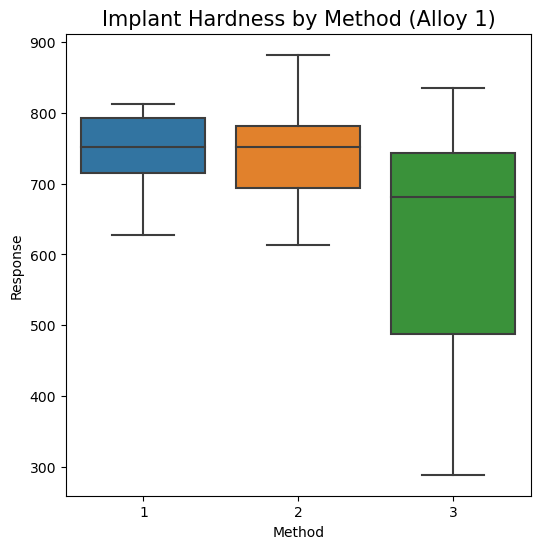

In [35]:
print(df_alloy1.groupby("Method")["Response"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "Method", y = 'Response' , data = df_alloy1)
a.set_title("Implant Hardness by Method (Alloy 1)", fontsize=15)
plt.show()

Method
1    836.666667
2    863.666667
3    627.866667
Name: Response, dtype: float64


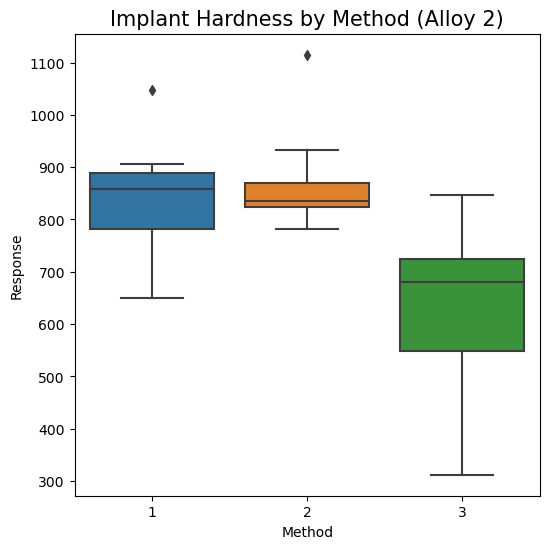

In [36]:
print(df_alloy2.groupby("Method")["Response"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "Method", y = 'Response' , data = df_alloy2)
a.set_title("Implant Hardness by Method (Alloy 2)", fontsize=15)
plt.show()

In this analysis, we aim to determine if there are significant differences in the mean implant hardness among methods. We will utilize a **One-way ANOVA test** to compare the means from multiple methods and assess if there is any significant variation in implant hardness attributed to different methods. However, to ensure the reliability of the ANOVA results, we need to verify two key assumptions:

**One-way ANOVA test**

1.Normality Assumption: Shapiro-Wilk’s test will be applied to the response variable (implant hardness) to assess if the data follows a normal distribution.

2.Equality of Variance Assumption: Levene's test will be applied to the response variable to assess if the variance of implant hardness is equal across all methods.



**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ distribution of implant hardness measurements follows a normal distribution.

against the alternative hypothesis

>$H_a:$ distribution of implant hardness measurements deviates from a normal distribution.

In [37]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df_alloy1['Response']) 
print("Shapiro-Wilk's test p-value for Alloy 1:", p_value)

Shapiro-Wilk's test p-value for Alloy 1: 1.1945070582441986e-05


In [38]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df_alloy2['Response']) 
print("Shapiro-Wilk's test p-value for Alloy 2:", p_value)

Shapiro-Wilk's test p-value for Alloy 2: 0.00040293222991749644


Since p-value(both alloy type 1 and 2) of the test is smaller than the 5% significance level, we can reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [39]:
statistic, p_levene_alloy1 = stats.levene(df_alloy1[df_alloy1['Method'] == 1]['Response'],
                                            df_alloy1[df_alloy1['Method'] == 2]['Response'],
                                            df_alloy1[df_alloy1['Method'] == 3]['Response']
                                            )
print("Levene's test p-value for Alloy 1:", p_levene_alloy1)

Levene's test p-value for Alloy 1: 0.0034160381460233975


In [40]:
statistic, p_levene_alloy1 = stats.levene(df_alloy2[df_alloy2['Method'] == 1]['Response'],
                                            df_alloy2[df_alloy2['Method'] == 2]['Response'],
                                            df_alloy2[df_alloy2['Method'] == 3]['Response']
                                            )
print("Levene's test p-value for Alloy 2:", p_levene_alloy1)

Levene's test p-value for Alloy 2: 0.04469269939158668


Since the p-value(for both alloys) is smaller than the 5% significance level, reject the null hypothesis of homogeneity of variances.

we select $\alpha = 0.05$

**Calculate the p-value**

- We will use the `f_oneway()` function from the `scipy.stats` library to perform a one-way ANOVA test.
- The `f_oneway()` function takes the sample observations from the different groups and returns the test statistic and the p-value for the test. 
    - The sample observations are the implant hardness measurements with respect to the Methods.

In [41]:
# Perform one-way ANOVA for Alloy 1
test_stat_alloy1, p_anova_alloy1 = f_oneway(df_alloy1[df_alloy1['Method'] == 1]['Response'],
                                             df_alloy1[df_alloy1['Method'] == 2]['Response'],
                                             df_alloy1[df_alloy1['Method'] == 3]['Response'])

# Perform one-way ANOVA for Alloy 2
test_stat_alloy2, p_anova_alloy2 = f_oneway(df_alloy2[df_alloy2['Method'] == 1]['Response'],
                                             df_alloy2[df_alloy2['Method'] == 2]['Response'],
                                             df_alloy2[df_alloy2['Method'] == 3]['Response'])

print("ANOVA p-value for Alloy 1:", p_anova_alloy1)
print("ANOVA p-value for Alloy 2:", p_anova_alloy2)

ANOVA p-value for Alloy 1: 0.004163412167505543
ANOVA p-value for Alloy 2: 5.415871051443187e-06


 ### Compare the p-value with $\alpha$

In [42]:
if p_anova_alloy1 < 0.05:
    print("Reject null hypothesis: There are significant differences in implant hardness among dentists for Alloy 1.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in implant hardness among dentists for Alloy 1.")

Reject null hypothesis: There are significant differences in implant hardness among dentists for Alloy 1.


In [43]:
if p_anova_alloy2 < 0.05:
    print("Reject null hypothesis: There are significant differences in implant hardness among dentists for Alloy 1.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in implant hardness among dentists for Alloy 1.")

Reject null hypothesis: There are significant differences in implant hardness among dentists for Alloy 1.


Results suggest that there is a significant difference in implant hardness across different methods for both alloy types.

### Multiple Comparison test (Tukey HSD)

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_alloy1['Response'], groups = df_alloy1['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df_alloy2['Response'], groups = df_alloy1['Method'], alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


## Conclusions

* Shapiro-Wilk's test indicates that the normality assumption is violated for dentists for both Alloy type 1 and type 2.
* Significant difference is observed between Method 1 and Method 3 and Method 2 and Method 3 for Alloy 1.
* Significant difference is observed between Method 1 and Method 3 and Method 2 and Method 3 for Alloy 2.
* ANOVA p-value is smaller than the significance level (𝛼 = 0.05), indicating  significant difference in implant hardness among Methods for Alloy 1 and Alloy 2.
* For both Alloy 1 and Alloy 2, Methods 1 and 3, as well as Methods 2 and 3, exhibit significant differences in implant hardness.
* No significant difference in implant hardness is found between Methods 1 and 2 for either alloy.

##### 3.What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

In [46]:
def create_interaction_plot(data, alloy_type):
    plt.figure(figsize=(10, 6))
    sns.pointplot(data=data, x='Method', y='Response', hue='Dentist',ci=None)
    plt.title(f'Interaction Plot for Alloy {alloy_type}')
    plt.xlabel('Method')
    plt.ylabel('Response (Hardness)')
    plt.legend(title='Dentist')
    plt.grid(True)
    plt.show()

C:\Users\AKHIL MOHANDAS\AppData\Local\Temp\ipykernel_21344\3863579878.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x='Method', y='Response', hue='Dentist',ci=None)


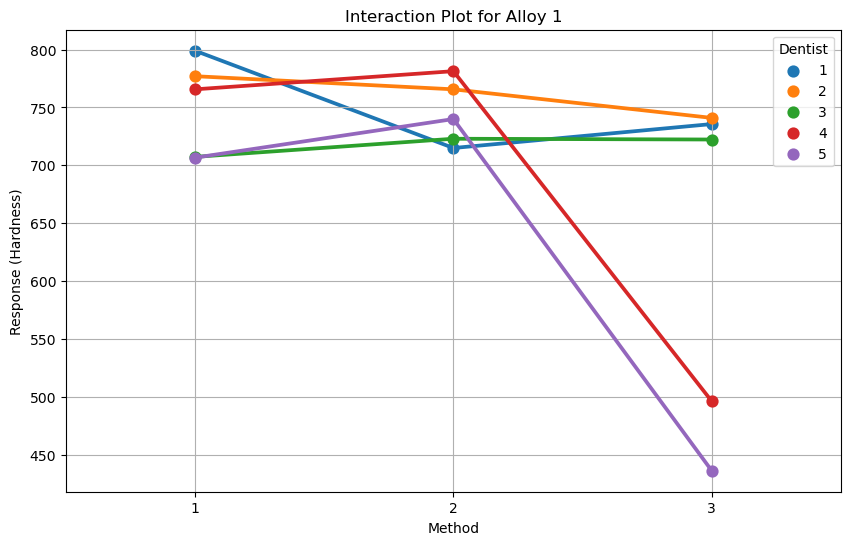

C:\Users\AKHIL MOHANDAS\AppData\Local\Temp\ipykernel_21344\3863579878.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x='Method', y='Response', hue='Dentist',ci=None)


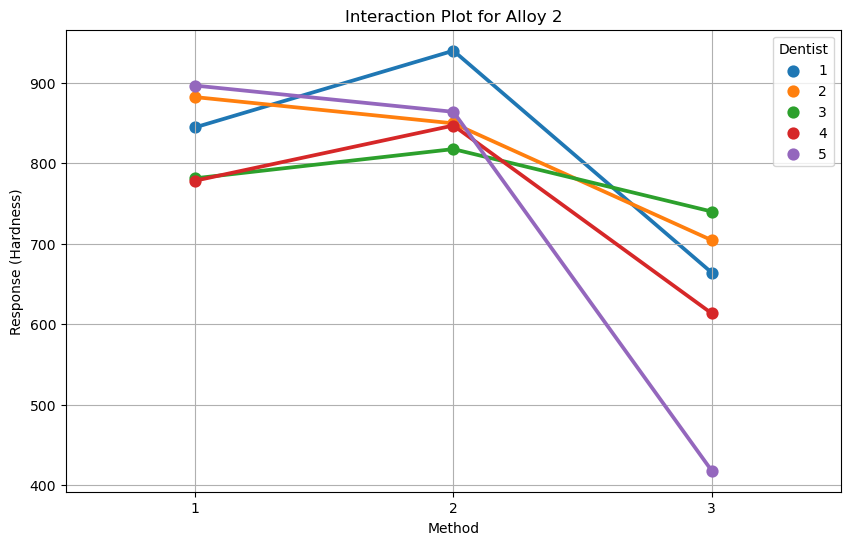

In [47]:
create_interaction_plot(df_alloy1, 1)
create_interaction_plot(df_alloy2, 2)

We can see that hardness of metal implants in dental cavities low for Alloy 1 used for dentists 4 and 5, And for alloy 2 the  hardness is lower for Method 3.

The point plot indicates that there is an interaction effect between Dentist and Method, with the lines representing different Dentists showing variation across the levels of Method. However, it seems that this interaction effect may not be as pronounced for Method 3 compared to the other methods for Alloy 2.

##### 4.How does the hardness of implants vary depending on dentists and methods together?

Null and Alternate Hypotheses

For each alloy type, the hypotheses are:

###### Null Hypothesis (H0): 
* The null hypothesis states that there is no significant difference in the mean response among the different dentists.
###### Alternate Hypothesis (H1): 
* The null hypothesis states that there is significant difference in the mean response among the different dentists.

In [48]:
formula = 'Response ~ C(Dentist)'
model = ols(formula, df_alloy1).fit()
aov_table1 = anova_lm(model)
print('ANOVA Table for Alloy 1 - Dentist:\n',aov_table1)
formula = 'Response ~ C(Dentist)'
model = ols(formula, df_alloy2).fit()
aov_table2 = anova_lm(model)
print('ANOVA Table for Alloy 2 - Dentist:\n',aov_table2)

ANOVA Table for Alloy 1 - Dentist:
               df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN
ANOVA Table for Alloy 2 - Dentist:
               df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


For both Alloy 1 and Alloy 2, the factor "Dentist" does not have a significant effect on the mean response (hardness of dental implants) based on the given data.

Null and Alternate Hypotheses

For each alloy type, the hypotheses are:

###### Null Hypothesis (H0): 
* The null hypothesis states that there is no significant difference in the mean response among the different Method.
###### Alternate Hypothesis (H1): 
* The null hypothesis states that there is significant difference in the mean response among the different Method.

In [49]:
formula = 'Response ~ C(Method)'
model = ols(formula, df_alloy1).fit()
aov_table1 = anova_lm(model)
print('ANOVA Table for Alloy 1 - Method:\n',aov_table1)
formula = 'Response ~ C(Dentist)'
model = ols(formula, df_alloy2).fit()
aov_table2 = anova_lm(model)
print('ANOVA Table for Alloy 2 - Method:\n',aov_table2)

ANOVA Table for Alloy 1 - Method:
              df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN
ANOVA Table for Alloy 2 - Method:
               df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


For Alloy 1, there is evidence to suggest that the factor "Method" has a significant effect on the mean response (hardness of dental implants). However, for Alloy 2, the ANOVA table does not provide sufficient information to draw conclusions about the effect of the Method factor.

Null and Alternate Hypotheses

For each alloy type, the hypotheses are:

###### Null Hypothesis (H0): 
* There is no significant difference in the mean response among the different Dentists.
* There is no significant difference in the mean response among the different Methods.
* There is no interaction effect between Dentist and Method on the response.
###### Alternate Hypothesis (H1): 
* There is a significant difference in the mean response among the different Dentists.
* There is a significant difference in the mean response among the different Methods.
* There is an interaction effect between Dentist and Method on the response.

C:\Users\AKHIL MOHANDAS\AppData\Local\Temp\ipykernel_21344\935701881.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Dentist', y='Response', data=df_alloy1, hue='Method', ci=None)


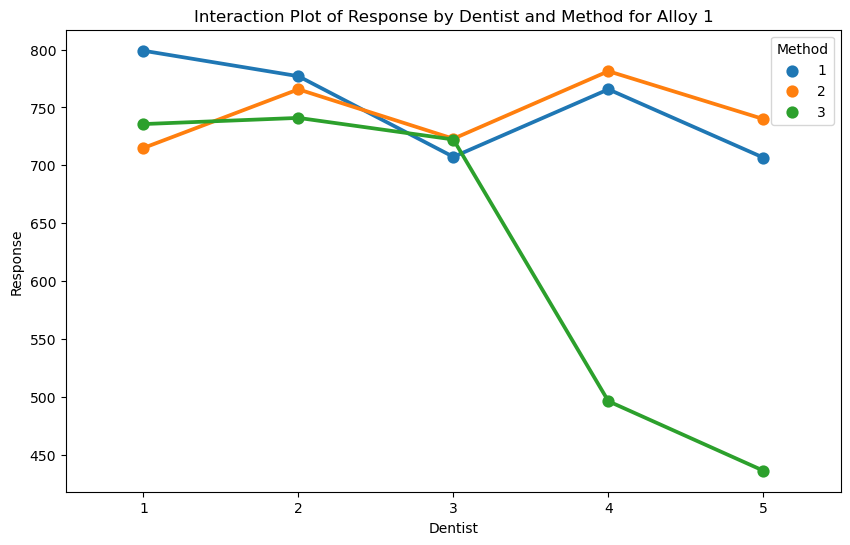

In [50]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Dentist', y='Response', data=df_alloy1, hue='Method', ci=None)
plt.title('Interaction Plot of Response by Dentist and Method for Alloy 1')
plt.xlabel('Dentist')
plt.ylabel('Response')
plt.legend(title='Method')
plt.show()

significant interaction effect between 'Dentist' and 'Method' indicates that the effect of the dental implant procedure's method on the hardness of dental implants varies depending on which dentist performs the procedure.

C:\Users\AKHIL MOHANDAS\AppData\Local\Temp\ipykernel_21344\1928152989.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Dentist', y='Response', data=df_alloy2, hue='Method', ci=None)


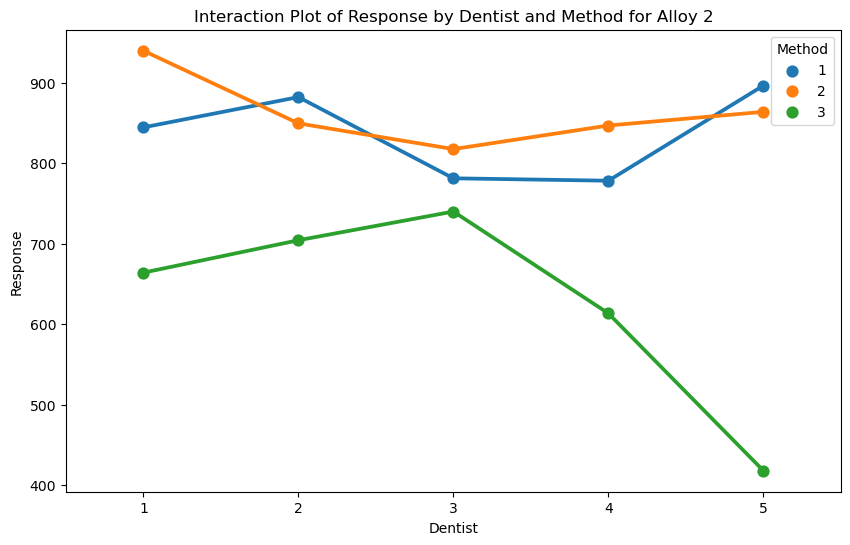

In [51]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Dentist', y='Response', data=df_alloy2, hue='Method', ci=None)
plt.title('Interaction Plot of Response by Dentist and Method for Alloy 2')
plt.xlabel('Dentist')
plt.ylabel('Response')
plt.legend(title='Method')
plt.show()

For Method 3, interaction effect is not apparent, indicating that the method's impact on implant hardness remains consistent across different dentists.

In [52]:
from statsmodels.stats.anova import _get_covariance,anova_lm

model_alloy1 = ols('Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)', data=df_alloy1).fit()
anova_results_alloy1 = anova_lm(model_alloy1)

In [53]:
print("ANOVA results for Alloy 1:")
print(anova_results_alloy1)

ANOVA results for Alloy 1:
                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0  106683.688889  26670.922222   3.899638  0.011484
C(Method)              2.0  148472.177778  74236.088889  10.854287  0.000284
C(Dentist):C(Method)   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual              30.0  205180.000000   6839.333333        NaN       NaN


In [54]:
from statsmodels.stats.anova import _get_covariance,anova_lm

model_alloy2 = ols('Response ~ C(Dentist) * C(Method)', data=df_alloy2).fit()
anova_results_alloy2 = anova_lm(model_alloy2)

In [55]:
print("ANOVA results for Alloy 2:")
print(anova_results_alloy2)

ANOVA results for Alloy 2:
                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   56797.911111   14199.477778   1.106152  0.371833
C(Method)              2.0  499640.400000  249820.200000  19.461218  0.000004
C(Dentist):C(Method)   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual              30.0  385104.666667   12836.822222        NaN       NaN


### CONCLUSIONS:

##### For Alloy 1:

* Dentist: The p-value (0.011484) indicates a significant effect of different dentists on the hardness of the dental implants. This means that the hardness of the implants varies depending on which dentist performed the procedure.
* Method: The p-value (0.000284) indicates a significant effect of different methods on the hardness of the dental implants. This means that the method used to perform the procedure affects the hardness of the implants.
* Interaction: The p-value (0.006793) indicates a significant interaction effect between dentist and method. This means that the effect of the method on the hardness of the implants depends on which dentist performed the procedure.

##### For Alloy 2:

* Dentist: The p-value (0.371833) indicates no significant effect of different dentists on the hardness of the dental implants. This means that the hardness of the implants does not vary significantly depending on which dentist performed the procedure.
* Method: The p-value (0.000004) indicates a significant effect of different methods on the hardness of the dental implants. This means that the method used to perform the procedure affects the hardness of the implants.
* Interaction: The p-value (0.093234) indicates no significant interaction effect between dentist and method. This means that the effect of the method on the hardness of the implants does not significantly depend on which dentist performed the procedure.
